 This notebook demonstrates all of the  photometry analysis used for the paper: "Fill in Title Later" by Rebecca Suthard and Ryan Senne et al. from the Ramirez Group.

In [26]:
import sys
sys.path.append("/home/ryansenne/PycharmProjects/RamiPho/")

# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pymc
import arviz as az
from scipy import stats
from pathlib import Path
import photonsoup as fp

In [2]:
path = Path("/home/ryansenne/Data/RLS_Team_Data/Dual_Color/")

npm_path = path / "NPM_Files"
dlc_path = path / "DLC_Files"
any_path = path / "Anymaze_Files"

##### Create a set of fp curves for FC

In [3]:
shock_FC_2 = fp.FiberPhotometryCurve(npm_file= npm_path / "Test_Pho_dual_opto_chr2_shock_FC_m2.csv",
                                     dlc_file= dlc_path / "Test_Video_dual_opto_chr2_shock_FC_m2-004DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                     anymaze_file= any_path / "shock_2_old_dual_engram_FC_freeze.csv",
                                     offset=1048.644864, regress=True, ID="shock_FC_2", task="FC", treatment="shock")

shock_FC_6 = fp.FiberPhotometryCurve(npm_file=npm_path / "Shock_m6_fix_FC.csv",
                                     dlc_file=dlc_path / "Test_Video_dual_opto_chr2_shock_FC_m6-003DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                     anymaze_file= any_path / "shock_6_fc_freeze.csv",
                                     offset=3367.9992, regress=True, ID="shock_FC_6", task="FC", treatment="shock")#interpolated FC

shock_FC_8 = fp.FiberPhotometryCurve(npm_file=npm_path / "Shock_m8_fix_FC.csv",
                                     dlc_file=dlc_path / "Test_Video_dual_opto_chr2_shock_FC_m8-010DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                     anymaze_file= any_path / "shock_8_fc_freeze.csv",
                                     offset=4463.946304, regress=True, ID="shock_FC_8", task="FC", treatment="shock")#interpolated FC

shock_FC_9 = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_dual_opto_chr2_shock_FC_m9.csv",
                                     dlc_file=dlc_path / "Test_Video_dual_opto_chr2_shock_FC_m9-008DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                     anymaze_file= any_path / "shock_9_fc_freeze.csv",
                                     offset=4985.380768, regress=True, ID="shock_FC_9", task="FC", treatment="shock")

neutral_FC_2 = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_dual_opto_neutral_M2_Tag.csv",
                                       dlc_file=dlc_path / "Test_Video_dual_opto_neutral_M2_Tag-006DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                       anymaze_file= any_path / "neutral_2_fc_freeze.csv",
                                       offset=1600.014304,regress=True, ID="neutral_FC_2", task="FC", treatment="neutral")

neutral_FC_3 = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_dual_opto_neutral_M3_Tag.csv",
                                       dlc_file=dlc_path / "Test_Video_dual_opto_neutral_M3_Tag-004DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                       anymaze_file= any_path / "neutral_3_fc_freeze.csv",
                                       offset=2242.315776,regress=True, ID="neutral_FC_3", task="FC", treatment="neutral")

neutral_FC_5 = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_dual_opto_neutral_M5_Tag.csv",
                                       dlc_file=dlc_path / "Test_Video_dual_opto_neutral_M5_Tag-001DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                       anymaze_file= any_path / "neutral_5_fc_freeze.csv",
                                       offset=3544.831744,regress=True, ID="neutral_FC_5", task="FC", treatment="neutral")

neutral_FC_6 = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_dual_opto_neutral_M6_Tag.csv",
                                       dlc_file=dlc_path / "Test_Video_dual_opto_neutral_M6_Tag-002DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                       anymaze_file= any_path / "neutral_6_fc_freeze.csv",
                                       offset=4247.564736,regress=True, ID="neutral_FC_6", task="FC", treatment="neutral")

neutral_FC_9 = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_dual_opto_neutral_M9_Tag.csv",
                                       dlc_file=dlc_path / "Test_Video_dual_opto_neutral_M9_TagDLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                       anymaze_file= any_path / "neutral_9_fc_freeze.csv",
                                       offset=6476.010048,regress=True, ID="neutral_FC_9", task="FC", treatment="neutral")

eYFP_FC_1 = fp.FiberPhotometryCurve(npm_file=npm_path / "eYFP_M1_fix_FC.csv",
                                    dlc_file=dlc_path / "Test_Video_dual_opto_eYFP_shock_M1_FC-003DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                    anymaze_file= any_path / "eYFP_1_fc_freeze.csv",
                                    offset=2069.237856,regress=True, ID="eYFP_FC_1", task="FC", treatment="eYFP")

eYFP_FC_2 = fp.FiberPhotometryCurve(npm_file=npm_path / "eYFP_M2_fix_FC.csv",
                                    dlc_file=dlc_path / "Test_Video_dual_opto_eYFP_shock_M2_FC-004DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                    anymaze_file= any_path / "eYFP_2_fc_freeze.csv",
                                    offset=1219.886656,regress=True, ID="eYFP_FC_2", task="FC", treatment="eYFP")

eYFP_FC_3 = fp.FiberPhotometryCurve(npm_file=npm_path / "eYFP_M3_fix_FC.csv",
                                    dlc_file=dlc_path / "Test_Video_dual_opto_eYFP_shock_M3_FC-002DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                    anymaze_file= any_path / "eYFP_3_fc_freeze.csv",
                                    offset=2617.520768,regress=True, ID="eYFP_FC_3", task="FC", treatment="eYFP")

eYFP_FC_4 = fp.FiberPhotometryCurve(npm_file=npm_path / "eYFP_M4_fix_FC.csv",
                                    dlc_file=dlc_path / "Test_Video_dual_opto_eYFP_shock_M4_FC-001DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                    anymaze_file= any_path / "eYFP_4_fc_freeze.csv", 
                                    offset=3191.672608, regress=True, ID="eYFP_FC_4", task="FC", treatment="eYFP")

shock_new_m1 = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_m1_FC_113022.csv",
                                       dlc_file=dlc_path / "Test_Video_m1_FC_113022-001DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                       anymaze_file=any_path / "",
                                       offset=1907.98544, regress=True, ID="shock_new_m1", task="FC", treatment="shock")

shock_new_m2 = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_m2_FC_113022.csv",
                                       dlc_file=path / "Test_Video_m2_FC_113022DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                       anymaze_file=path / "shock_2_fc_freeze.csv",
                                       offset=2886.21888, regress=True, ID="shock_new_m2", task="FC", treatment="shock")

shock_new_m7 = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_m7_FC_113022.csv",
                                       dlc_file=dlc_path / "Test_Video_m7_FC_113022-003DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                       anymaze_file=any_path / "shock_6_fc_freeze.csv",
                                       offset=6106.110272, regress=True, ID="shock_new_m7", task="FC", treatment="shock")

shock_new_m8 = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_m8_FC_113022.csv",
                                       dlc_file=dlc_path / "Test_Video_m8_FC_113022-002DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                       anymaze_file=any_path/"shock_8_fc_freeze.csv",
                                       offset=6922.345984, regress=True, ID="shock_new_m8", task="FC", treatment="shock")

shock_new_m9 = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_m9_FC_113022.csv",
                                       dlc_file=dlc_path / "Test_Video_m9_FC_113022-005DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                        anymaze_file=any_path / "shock_9_fc_freeze.csv",
                                       offset=7827.630528, regress=True, ID="shock_new_m9", task="FC", treatment="shock")

shock_new_m10 = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_m10_FC_113022.csv",
                                        dlc_file=dlc_path / "Test_Video_m10_FC_113022-001DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv", 
                                        anymaze_file= any_path / "shock_M10_FC_freezing.csv",
                                        offset=8664.011616, regress=True, ID="shock_new_m10", task="FC", treatment="shock")

eYFP_m5_FC = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_dual_opto_shock_eYFP_m5_FC.csv",
                                     dlc_file=dlc_path / "Test_Video_dual_opto_shock_eYFP_m5_FC-007DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                     anymaze_file= any_path / "eYFP_M5_FC_freezing.csv",
                                     offset=2494.345376, regress=True, ID="eYFP_m5_FC", task="FC", treatment="eYFP")

eYFP_m6_FC = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_dual_opto_shock_eYFP_m6_FC.csv",
                                     dlc_file=dlc_path / "Test_Video_dual_opto_shock_eYFP_m6_FC-003DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                     anymaze_file= any_path / "eYFP_M6_FC_freezing.csv",
                                     offset=3180.09312, regress=True, ID="eYFP_m6_FC", task="FC", treatment="eYFP")

eYFP_m7_FC = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_dual_opto_shock_eYFP_m7_FC.csv",
                                     dlc_file=dlc_path / "Test_Video_dual_opto_shock_eYFP_m7_FC-001DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                     anymaze_file= any_path / "eYFP_M7_FC_freezing.csv",
                                     offset=3941.079296, regress=True, ID="eYFP_m7_FC", task="FC", treatment="eYFP")

eYFP_m9_FC = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_dual_opto_shock_eYFP_m9_FC.csv",
                                     dlc_file=dlc_path / "Test_Video_dual_opto_shock_eYFP_m9_FC-006DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                     anymaze_file= any_path / "eYFP_M9_FC_freezing.csv",
                                     offset=5445.365856, regress=True, ID="eYFP_m9_FC", task="FC", treatment="eYFP")

neutral_m10_FC = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_dual_opto_neutral_m10_FC.csv",
                                         dlc_file=dlc_path / "Test_Video_dual_opto_neutral_m10_FC-005DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                         anymaze_file= any_path / "Neutral_M10_FC_freezing.csv",
                                         offset=8167.115392, regress=True, ID="neutral_m10_FC", task="FC", treatment="neutral")

neutral_m11_FC = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_dual_opto_neutral_m11_FC.csv",
                                         dlc_file=dlc_path / "Test_Video_dual_opto_neutral_m11_FC-002DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                         anymaze_file= any_path / "Neutral_M11_FC_freezing.csv",
                                         offset=8773.437472, regress=True, ID="neutral_m11_FC", task="FC", treatment="neutral")

neutral_m12_FC = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_dual_opto_neutral_m12_FC.csv",
                                         dlc_file=dlc_path / "Test_Video_dual_opto_neutral_m12_FC-004DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                         anymaze_file= any_path / "Neutral_M12_FC_freezing.csv",
                                         offset=9365.22896, regress=True, ID="neutral_m12_FC", task="FC", treatment="neutral")

In [7]:
fc_collection = fp.FiberPhotometryCollection()
fc_collection.add_curve(shock_FC_2, shock_FC_6, shock_FC_8, shock_FC_9)

fc_collection.batch_data()
fc_collection.batch_behavior(end=360)

/home/ryansenne/anaconda3/envs/RamiPho/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ryansenne/anaconda3/envs/RamiPho/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ryansenne/anaconda3/envs/RamiPho/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/ryansenne/anaconda3/envs/RamiPho/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/hom

In [8]:
X = fc_collection.design_matrix(task="FC", treatment="shock", region_g="Region1G", region_r="Region0R")
x_copy = X.drop(["R", "G", "Mouse_ID"], axis=1)
y = X["G"]

In [33]:
with pymc.Model() as model:
    # define priors
    beta = pymc.Normal("beta", mu=0, sigma=20, shape=x_copy.shape[1])
    sigma = pymc.HalfCauchy("sigma", beta=10)
    intercept = pymc.Normal("intercept", mu=0, sigma=20)
    # Define likelihood
    likelihood = pymc.Normal("y", mu=intercept+ pymc.math.dot(beta, x_copy.T), sigma=sigma, observed=y)
    idata = pymc.sample(3000, cores=22)

    

IndexError: too many indices for array

In [40]:
idaa.posterior["intercept"] + 

ValueError: Unable to coerce to Series/DataFrame, dimension must be <= 2: (22, 3000, 43)

In [64]:
z = np.dot(idaa.posterior["beta"], x_copy.T)
for i in range(z.shape[2]):
    z[:, :, i] += idaa.posterior['intercept']

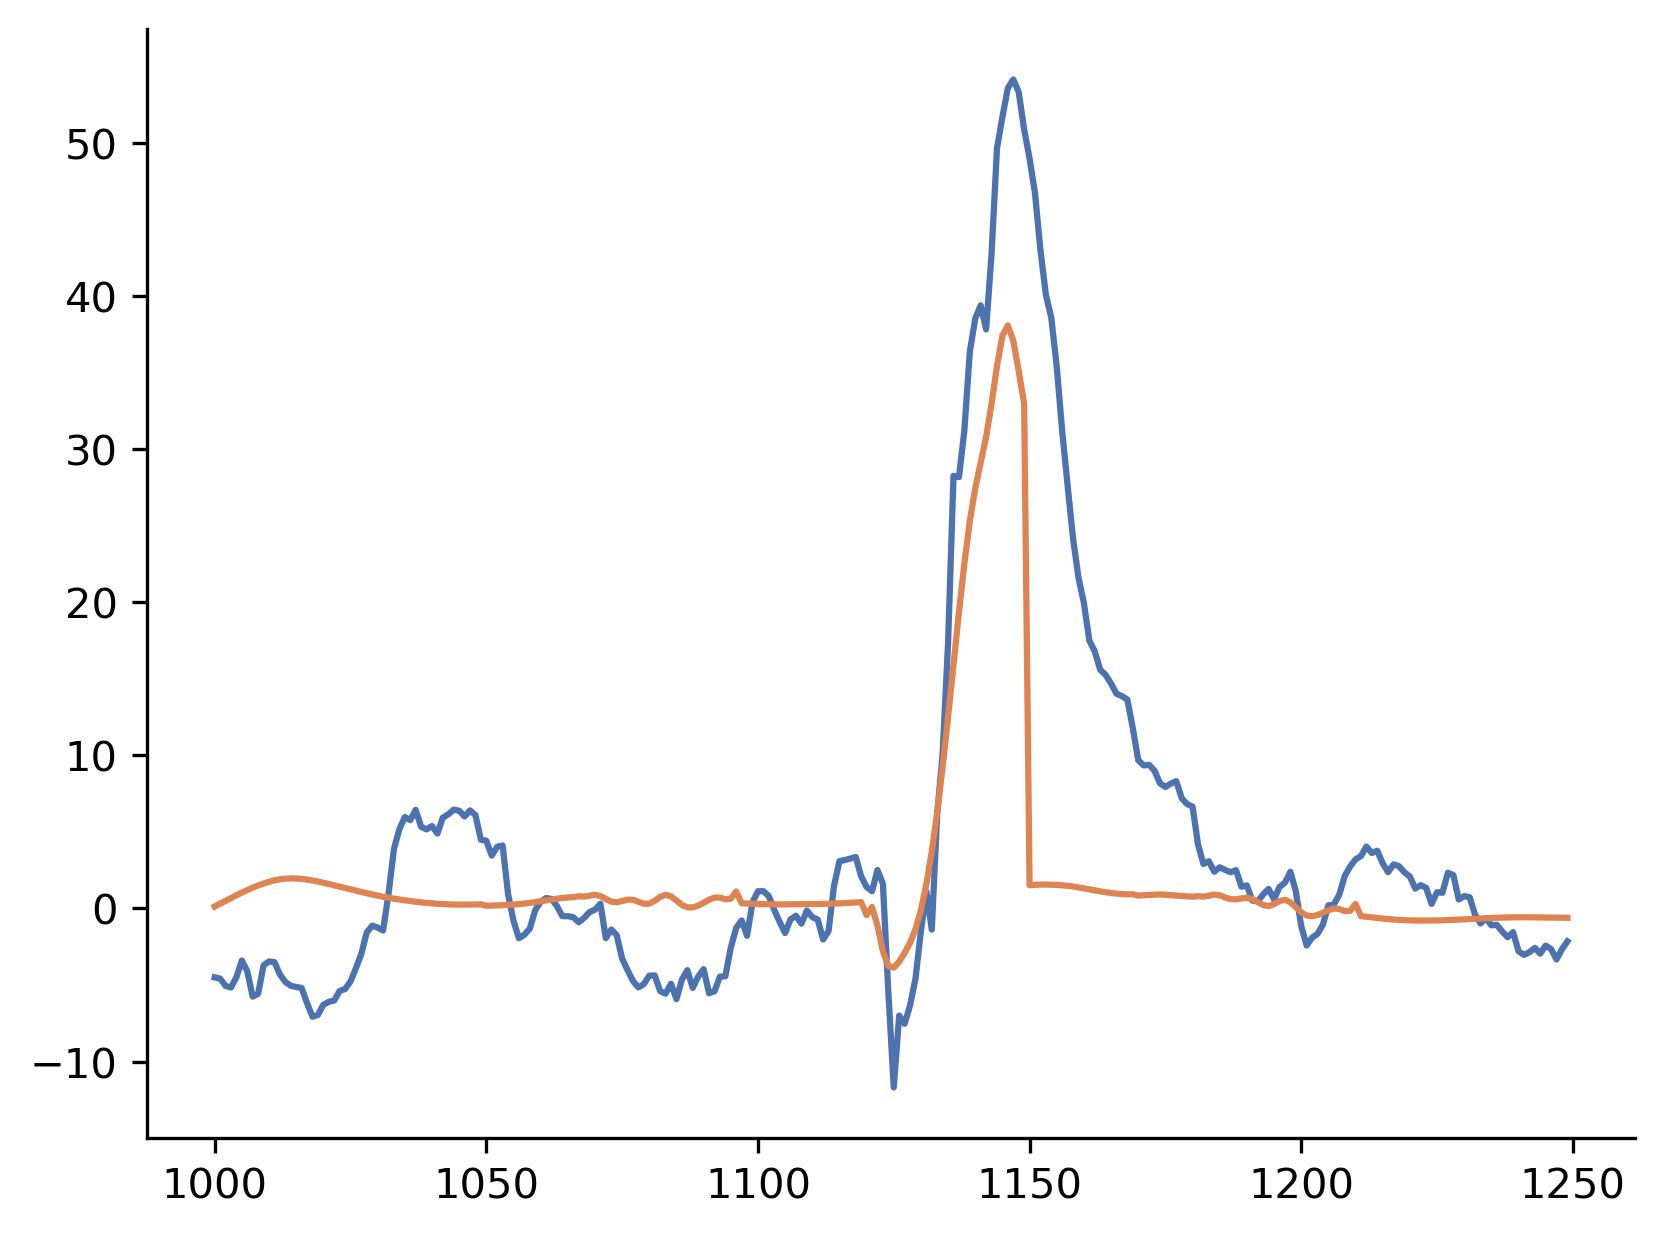

In [74]:
plt.plot(np.arange(1000,1250), y[1000:1250])
plt.plot(np.arange(1000,1250), z[0, 1, 1000:1250])


14.285714285714286